## Estadistica Aplicada
Sesión 7-5 septiembre

Francisco Javier Chávez Hernández 2034204

Gpo 44

In [63]:
#librerias basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
pip install lifelines

In [65]:
#libreria especializada
from lifelines import ExponentialFitter

In [66]:
#datos
datos_exp=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [67]:
datos_exp

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [68]:
#estimar un modelo de supervivencia exponencial
exp=ExponentialFitter().fit(datos_exp[' tiempo'], datos_exp[' estado'])

In [123]:
##riesgo de recaer
exp.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


In [ ]:
#probabilidad de no recaer en el mes 16 S(16)
exp.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

In [ ]:
exp.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,10,10
5.0,1,1,0,0,10
8.0,1,1,0,0,9
12.0,1,1,0,0,8
16.0,1,0,1,0,7
17.0,2,1,1,0,6
19.0,1,0,1,0,4
24.0,1,1,0,0,3
30.0,1,0,1,0,2


(0.0, 1.0)

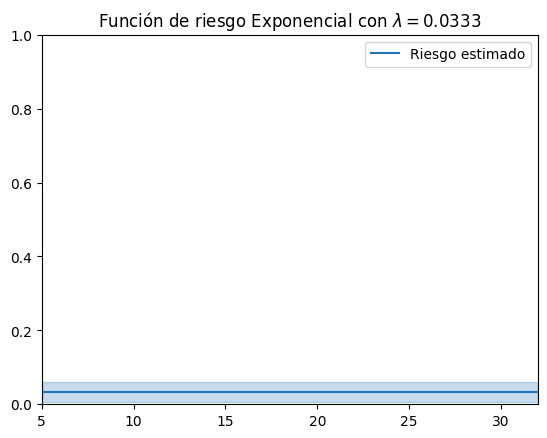

In [81]:
exp.plot_hazard(label='Riesgo estimado')
plt.title('Función de riesgo Exponencial con $\lambda=0.0333$')
plt.xlim(5,32)
plt.ylim(0,1)

Text(0.5, 1.0, 'Función de densidad de probabilidad $f(t)$ con $\\lambda=0.0333$')

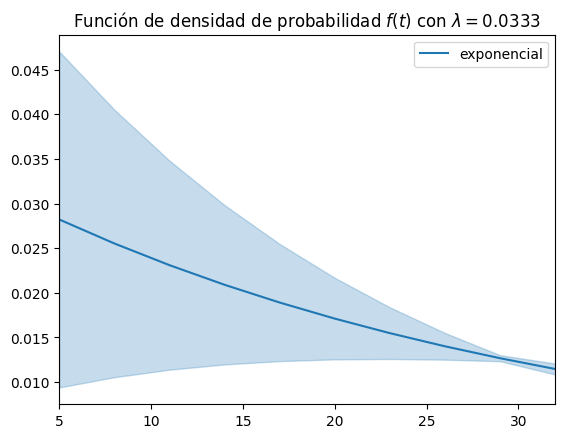

In [97]:
exp.plot_density(label='exponencial');
plt.xlim(5,32)
plt.title('Función de densidad de probabilidad $f(t)$ con $\lambda=0.0333$')

Text(0.5, 1.0, 'Función acumulada $F(t)$ con $\\lambda=0.0333$')

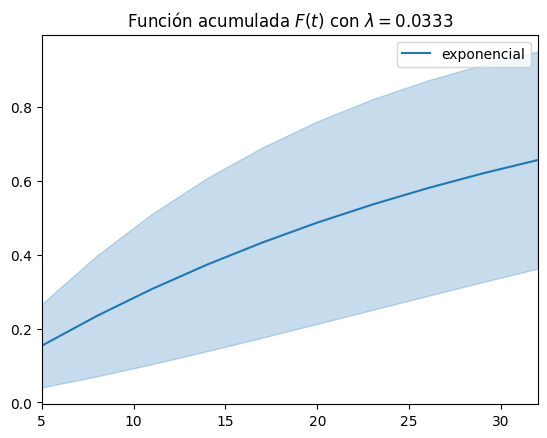

In [98]:
#acumulada
exp.plot_cumulative_density(label='exponencial');
plt.xlim(5,32)
plt.title('Función acumulada $F(t)$ con $\lambda=0.0333$')

Text(0.5, 1.0, 'Función de supervivencia $S(t)$ con $\\lambda=0.0333$')

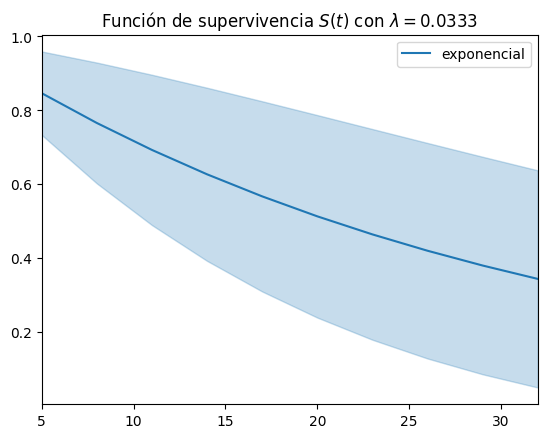

In [99]:
#S(t)
exp.plot_survival_function(label='exponencial');
plt.xlim(5,32)
plt.title('Función de supervivencia $S(t)$ con $\lambda=0.0333$')

In [100]:
from lifelines import WeibullFitter

Los datos se comportan como una función de densidad de probabilidad de Weibull

In [101]:
mweibull=WeibullFitter().fit(datos_exp[' tiempo'], datos_exp[' estado'])

(5.0, 32.0)

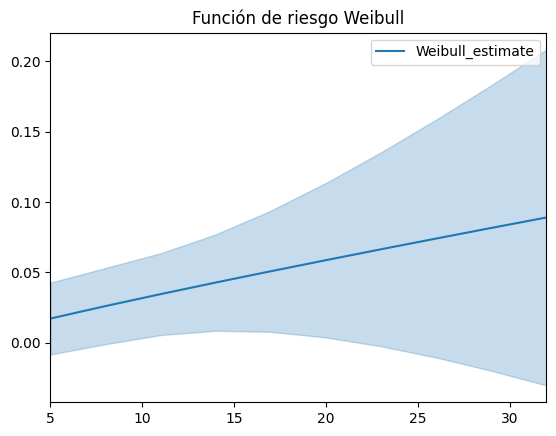

In [111]:
mweibull.plot_hazard();
plt.title('Función de riesgo Weibull')
plt.xlim(5,32)

In [115]:
#gamma=_rho
mweibull.rho_

1.8867259500116444

In [116]:
mweibull.lambda_

25.735295313316556

In [117]:
from lifelines import LogNormalFitter

In [119]:
mlogn=LogNormalFitter().fit(datos_exp[' tiempo'],datos_exp[' estado'])

(5.0, 32.0)

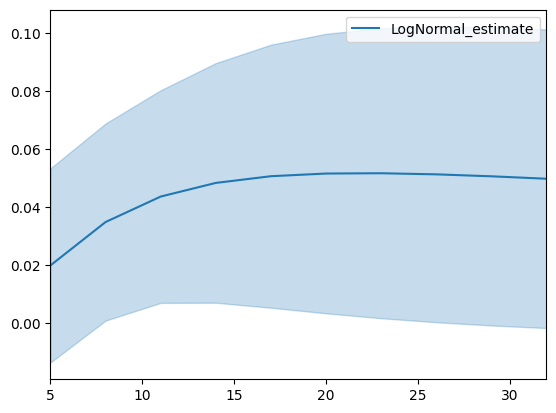

In [121]:
mlogn.plot_hazard()
plt.xlim(5,32)

In [122]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


In [132]:
#
print('Exponencial:',exp.AIC_.round(2),'Weibull:', mweibull.AIC_.round(2), 'LogNormal:',mlogn.AIC_.round(2))

Exponencial: 54.81 Weibull: 54.16 LogNormal: 54.51


El mejor modelo es el de menor valor de AIC

El tiempo de recaída de esta enfermedad se ajusta mejor a un modelo Weibull, donde conforme el tiempo avanza se incrementa el riesgo de recaer